### Exercici 1

**Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament**

1. Crea almenys una visualització per:
    - Una variable categòrica (Districte o Barri)
    - Una variable numèrica (Preu)
    - Una variable numèrica i una categòrica (Districte i Preu)
    - Dues variables numèriques (Any o Trimestre i Preu)
    - Tres variables (Barri o Districte, Trimestre i Preu)

In [2]:
import pandas as pd
import numpy as np

#importo el fitxer csv i carrego el df
cadastre = pd.read_csv('Downloads/plloguertrimibarri.csv')
cadastre

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


###### RESUM BBDD

_Aquesta BBDD ens mostra les diferents preus mitjans per barri i Districte (es pot calcular) al llarg del 2021 i dividits per trimestre._

**Punts a destacar**

1. Sorprèn que el Lloguer_mitja tingui dos variables. La qual cosa no em sembla molt adient que estigui en la mateixa columna. Per tant lo més fàcil seria crear dos dataframes nous a partir de l'orginal i després tornar-los a unir amb les columnes separades per cada una de les variables. (He fet un unique no fos cas que hi hagués algún altre valor, però només hi ha aquests dos).

2. Tampoc m'agrada que la m de lloguer mitja estigui en minúscula ja que em pot comportar algún error al no seguir el mateix criteri que la resta de capçaleres després del guió. Crec que lo ideal serà posar-ho tot en mínuscules ja que les paraules estan separades per guions.

3. Comprovar els Dtype

4. Si fem un describe només ens aportarà la mitja total del preu de lloguer de Barcelona, però te més lògica fer el resum agrupat per districte.  

**_Fem el pas 1, és  a dir, divideixo el df original en dos df i els torno a unir separant les variables de la columna Lloguer_mitja del df original_** 

In [3]:
#Creo dos df nous a partir l'original per separar el tipus de lloguer i el preu que tenen ja em facilitarà a l'hora de fer calculs
cadastre_lloguer_mitja_mes = cadastre[cadastre['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)']
cadastre_lloguer_mitja_m2 = cadastre[cadastre['Lloguer_mitja'] == 'Lloguer mitjà per superfície (Euros/m2 mes)']

#Creo un nou df unint els df creats anteriorment amb dos columnes noves. 
cadastre_lloguer = cadastre_lloguer_mitja_mes.merge(cadastre_lloguer_mitja_m2[['Trimestre', 'Nom_Barri', 'Lloguer_mitja', 'Preu']], on=['Trimestre', 'Nom_Barri'], how='left')

#Mostro el df
cadastre_lloguer

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja_x,Preu_x,Lloguer_mitja_y,Preu_y
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2,Lloguer mitjà per superfície (Euros/m2 mes),12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6,Lloguer mitjà per superfície (Euros/m2 mes),12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9,Lloguer mitjà per superfície (Euros/m2 mes),15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4,Lloguer mitjà per superfície (Euros/m2 mes),13.3
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0,Lloguer mitjà per superfície (Euros/m2 mes),12.9
...,...,...,...,...,...,...,...,...,...,...
287,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1205.3,Lloguer mitjà per superfície (Euros/m2 mes),15.2
288,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),700.5,Lloguer mitjà per superfície (Euros/m2 mes),10.8
289,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),977.8,Lloguer mitjà per superfície (Euros/m2 mes),13.8
290,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),826.2,Lloguer mitjà per superfície (Euros/m2 mes),11.7


**_Elimino les columnes de Lloguer mitja ja que si ho tinc separat no les necessito i canvio els noms de les columnes per saber que és cada preu. També aprofito per deixar tots els noms de les capçaleres en mínuscules_**

In [4]:
#Elimino les columnes que indiquen quin tipus de lloguer és ja que ho posarem com a titol de les columnes del preu així fem el df més curt i més manejable i de fàcil visualització
cadastre_lloguer = cadastre_lloguer.drop(['Lloguer_mitja_x', 'Lloguer_mitja_y'], axis=1)

#Renombrem les columnes de preu per saber de quin tipus de preu es tracten
cadastre_lloguer = cadastre_lloguer.rename(columns={'Preu_x': 'Preu_lloguer_mitja_mes', 'Preu_y': 'Preu_lloguer_mitja_m2'})

#Fem que les capçaleres de les columnes tinguin totes el mateix format (mínuscules)
cadastre_lloguer.columns = cadastre_lloguer.columns.str.lower()

#Mostrem el df
cadastre_lloguer

,any,trimestre,codi_districte,nom_districte,codi_barri,nom_barri,preu_lloguer_mitja_mes,preu_lloguer_mitja_m2
0,2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3
4,2021,1,2,Eixample,5,el Fort Pienc,918.0,12.9
...,...,...,...,...,...,...,...,...
287,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1205.3,15.2
288,2021,4,10,Sant Martí,70,el Besòs i el Maresme,700.5,10.8
289,2021,4,10,Sant Martí,71,Provençals del Poblenou,977.8,13.8
290,2021,4,10,Sant Martí,72,Sant Martí de Provençals,826.2,11.7


**_He comprovat que el dtype dels preus es erroni està com a objecte i ho hauria de fer a float perquè te decimals. Al fer-ho he vist que em donava error perquè hi ha valors "--" per tant haig d'ometre aquestes files_**

In [5]:
#Que el df cadastre_lloguer tingui només les files que no tinguin el valor '--' dins de preu_lloguer_mitja_mes (son les mateixes que preu_lloguer_mitja_m2) 
cadastre_lloguer = cadastre_lloguer[cadastre_lloguer['preu_lloguer_mitja_mes'] != '--']

#Canviem el dtype del preu a float ja que és una dada númerica i te decimals
cadastre_lloguer[['preu_lloguer_mitja_mes', 'preu_lloguer_mitja_m2']] = cadastre_lloguer[['preu_lloguer_mitja_mes', 'preu_lloguer_mitja_m2']].astype(float)

#Resetegem l'index perquè sigui correlatiu
cadastre_lloguer.reset_index(drop=True)

C:\Users\bgarm\AppData\Local\Temp\ipykernel_24648\3466440891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadastre_lloguer[['preu_lloguer_mitja_mes', 'preu_lloguer_mitja_m2']] = cadastre_lloguer[['preu_lloguer_mitja_mes', 'preu_lloguer_mitja_m2']].astype(float)


,any,trimestre,codi_districte,nom_districte,codi_barri,nom_barri,preu_lloguer_mitja_mes,preu_lloguer_mitja_m2
0,2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3
4,2021,1,2,Eixample,5,el Fort Pienc,918.0,12.9
...,...,...,...,...,...,...,...,...
265,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1205.3,15.2
266,2021,4,10,Sant Martí,70,el Besòs i el Maresme,700.5,10.8
267,2021,4,10,Sant Martí,71,Provençals del Poblenou,977.8,13.8
268,2021,4,10,Sant Martí,72,Sant Martí de Provençals,826.2,11.7


**_Ara si puc fer el resum estadistic agrupat per districtes i general_**

In [6]:
#Resum estadístic general em donarà les dades mitjanes de la ciutat de Barcelona
cadastre_lloguer[['preu_lloguer_mitja_mes', 'preu_lloguer_mitja_m2']].describe()

,preu_lloguer_mitja_mes,preu_lloguer_mitja_m2
count,270.000000,270.000000
mean,871.593704,12.720741
std,221.192799,1.701480
min,447.500000,6.700000
25%,742.475000,11.625000
50%,816.350000,12.750000
75%,934.525000,13.600000
max,1816.500000,18.000000


In [7]:
#Resum estadístic agrupat per districte
cadastre_lloguer.groupby('nom_districte')[['preu_lloguer_mitja_mes', 'preu_lloguer_mitja_m2']].describe()

preu_lloguer_mitja_mes                                  \
                                     count         mean         std    min   
nom_districte                                                                
Ciutat Vella                          16.0   858.925000   70.783468  759.2   
Eixample                              24.0  1000.545833  105.239524  887.1   
Gràcia                                20.0   877.265000   65.810072  745.4   
Horta-Guinardó                        40.0   765.007500   61.542836  653.5   
Les Corts                             12.0  1214.066667  359.670946  904.8   
Nou Barris                            40.0   664.292500   71.115199  488.1   
Sant Andreu                           26.0   721.196154   94.357187  447.5   
Sant Martí                            40.0   916.450000  178.808413  700.5   
Sants-Montjuïc                        28.0   798.932143   38.952935  691.9   
Sarrià-Sant Gervasi                   24.0  1271.212500  190.916844  990.1   

                                                          \
                          25%      50%       75%     max   
nom_districte                                              
Ciutat Vella          800.225   870.00   924.500   968.4   
Eixample              922.800   964.95  1070.800  1220.8   
Gràcia                859.175   895.65   921.800   961.0   
Horta-Guinardó        726.450   756.30   817.825   884.2   
Les Corts             969.000  1007.90  1618.475  1816.5   
Nou Barris            624.125   671.80   700.675   803.7   
Sant Andreu           647.800   755.45   792.500   827.2   
Sant Martí            795.350   869.20   976.975  1364.7   
Sants-Montjuïc        778.325   805.25   818.350   872.5   
Sarrià-Sant Gervasi  1138.375  1278.85  1371.625  1597.4   

                    preu_lloguer_mitja_m2                                     \
                                    count       mean       std   min     25%   
nom_districte                                                                  
Ciutat Vella                         16.0  13.775000  1.417274  12.3  12.875   
Eixample                             24.0  13.300000  0.353861  12.5  13.000   
Gràcia                               20.0  13.380000  0.661418  12.1  12.800   
Horta-Guinardó                       40.0  11.987500  0.810567   9.5  11.675   
Les Corts                            12.0  14.008333  0.994949  12.5  13.250   
Nou Barris                           40.0  10.922500  1.160788   8.1   9.975   
Sant Andreu                          26.0  11.153846  1.215971   6.7  10.750   
Sant Martí                           40.0  13.440000  1.855664  10.8  11.675   
Sants-Montjuïc                       28.0  12.678571  0.950383  10.2  12.450   
Sarrià-Sant Gervasi                  24.0  15.012500  1.265362  11.4  14.450   

                                          
                       50%     75%   max  
nom_districte                             
Ciutat Vella         13.20  14.375  16.4  
Eixample             13.30  13.600  14.0  
Gràcia               13.60  13.900  14.3  
Horta-Guinardó       12.10  12.625  13.4  
Les Corts            13.90  14.425  15.8  
Nou Barris           11.45  11.725  12.7  
Sant Andreu          11.60  11.875  12.5  
Sant Martí           13.15  14.675  17.3  
Sants-Montjuïc       13.00  13.200  13.8  
Sarrià-Sant Gervasi  15.10  15.750  18.0

In [8]:
#Resum estadístic agrupat per trimestre
cadastre_lloguer.groupby('trimestre')[['preu_lloguer_mitja_mes', 'preu_lloguer_mitja_m2']].describe()

preu_lloguer_mitja_mes                                         \
                           count        mean         std    min     25%   
trimestre                                                                 
1                           67.0  869.304478  221.532974  520.2  741.25   
2                           68.0  851.910294  211.952236  447.5  733.65   
3                           67.0  880.794030  225.841873  547.7  752.40   
4                           68.0  884.467647  228.631872  546.8  750.05   

                                  preu_lloguer_mitja_m2                       \
             50%      75%     max                 count       mean       std   
trimestre                                                                      
1          808.9  928.000  1598.2                  67.0  12.691045  1.562800   
2          812.8  911.425  1680.3                  68.0  12.564706  1.779717   
3          823.6  968.500  1816.5                  67.0  12.771642  1.656558   
4          826.7  958.250  1679.3                  68.0  12.855882  1.816622   

                                            
           min    25%    50%     75%   max  
trimestre                                   
1          9.0  11.65  12.50  13.550  17.3  
2          6.7  11.55  12.75  13.500  17.3  
3          9.3  11.60  12.80  13.600  16.9  
4          9.2  11.80  12.95  13.925  18.0

### Variable categorica (Barris per districte)

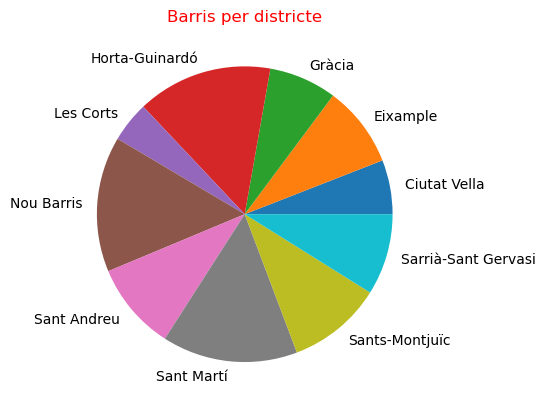

In [9]:
import matplotlib.pyplot as plt

#Gràfic
cadastre_lloguer.groupby('nom_districte')['nom_barri'].count().plot(kind='pie')

#Títol i etiquetes eixos
plt.title('Barris per districte', color='red')
plt.ylabel('')

#Guardar imatge
plt.savefig('Barris per districte.jpg')

#Mostrar gràfica
plt.show()

##### Comentaris de la visualització

Podem veure que el districte Horta-Guniardó, Nou Barris i Sant Martí son el districtes amb més barris i, per contra, Les corts i Ciutat vella els que menys.

És important tenir-ho en compte perquè a priori diria que a més observacions (barris en aquest cas) hi ha menys diferencia entre els extrems de min i max (mitjana). 

### Una variable numèrica (Preu)

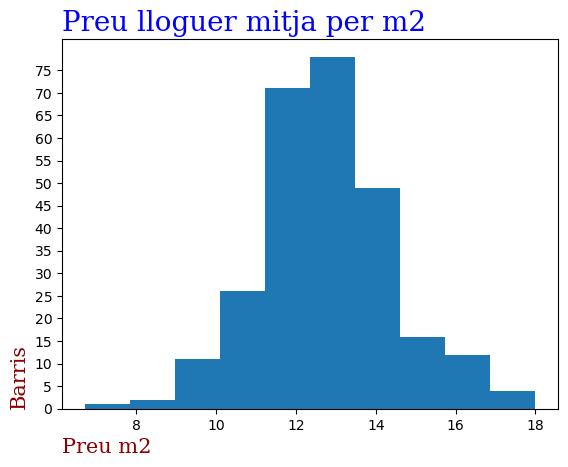

In [10]:
#Gràfic
cadastre_lloguer['preu_lloguer_mitja_m2'].plot(kind='hist')
plt.yticks(np.arange(0, 80, 5))

#Títol i etiquetes eixos
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title('Preu lloguer mitja per m2', fontdict = font1, loc = 'left')
plt.xlabel('Preu m2', fontdict = font2, loc = 'left') 
plt.ylabel('Barris', fontdict = font2, loc = 'bottom')

#Guardar imatge
plt.savefig('Preu lloguer mitja per m2.jpg')

#Mostrar gràfica
plt.show()

##### Comentaris de la visualització

Amb aquest gràfic histograma podem observar com la majoria dels barris es concentren entre 11 i 13 euros/m2 (aproximadament).
Hi ha un o dos barris només que estan per sota del 8e/m2 i 5 entre els 17 i 18e/m2

### Una variable numèrica i una categòrica (Districte i Preu)

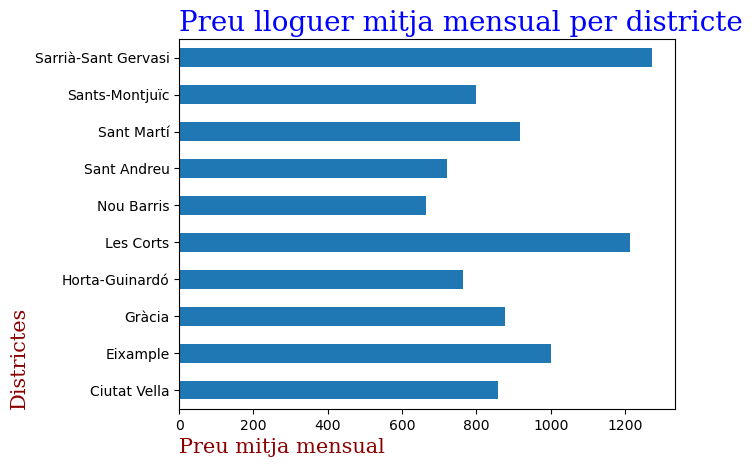

In [11]:
#Gràfic
cadastre_lloguer.groupby('nom_districte')['preu_lloguer_mitja_mes'].mean().plot(kind='barh')

#Títol i etiquetes eixos
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title('Preu lloguer mitja mensual per districte', fontdict = font1, loc = 'left')
plt.ylabel('Districtes', fontdict = font2, loc = 'bottom') 
plt.xlabel('Preu mitja mensual', fontdict = font2, loc = 'left')

#Guardar imatge
plt.savefig('Preu lloguer mitja mensual per districte.jpg')

#Mostrar gràfica
plt.show()

##### Comentaris de la visualització

Podem veure que la mitja mensual més cara son els districtes de Sarrià-Sant Gervasi i Les Corts destacadement. 
Per altra banda la resta de districtes estan és aprop entre ells, destecant Nou Barris, Sant Andreu i Horta Guinardo com els districtes amb una mitjana més baixa (Curiosament els que tenen més barris). 

### Dues variables numèriques (Any o Trimestre i Preu)

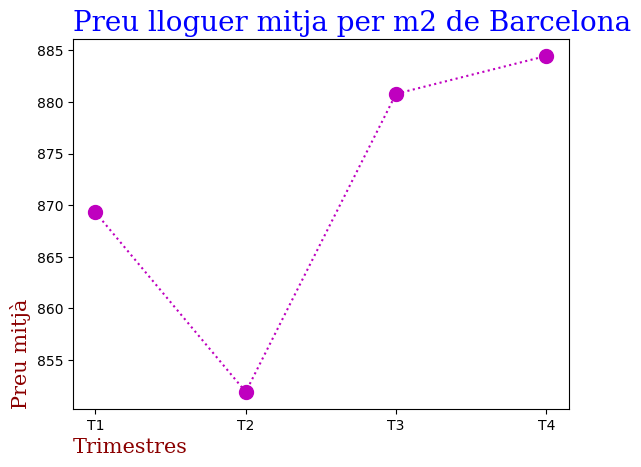

In [12]:
#Gràfic
plt.plot(cadastre_lloguer.groupby('trimestre')['preu_lloguer_mitja_mes'].mean(), 'o:m', ms=10)

#Establir que em surtin el nom que jo vull a l'etiqueta de les x
plt.xticks([1, 2, 3, 4], ['T1', 'T2', 'T3', 'T4'])

#Títol i etiquetes eixos
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title('Preu lloguer mitja per m2 de Barcelona', fontdict = font1, loc = 'left')
plt.ylabel('Preu mitjà', fontdict = font2, loc = 'bottom')
plt.xlabel('Trimestres', fontdict = font2, loc = 'left')

#Guardar imatge
plt.savefig('Preu lloguer mitja per m2 de Barcelona')

#Mostrar gràfica
plt.show()


##### Comentaris de la visualització

Aquest gràfic ens mostra la evolució per trimestre per saber el preu del lloguer mitja a Barcelona. Sorpren la gran caiguda en el T2 i la diferencia amb T3. Tot i que númericament no pot ser tant, si que gràficament es veu més clar. 

### Tres variables (Barri o Districte, Trimestre i Preu)

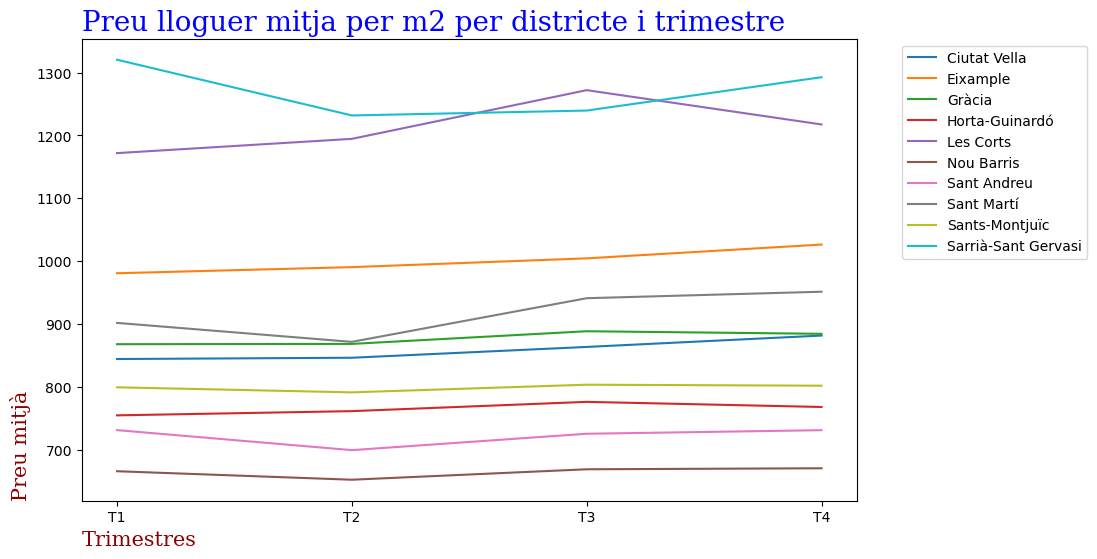

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por trimestre y distrito, y calcular el precio de alquiler medio por mes en cada grupo
grouped = cadastre_lloguer.groupby(['trimestre', 'nom_districte'])['preu_lloguer_mitja_mes'].mean().reset_index()

# Graficar el precio de alquiler medio por distrito y trimestre
plt.figure(figsize=(10, 6))
for districte in grouped['nom_districte'].unique():
    plt.plot(grouped[grouped['nom_districte']==districte]['trimestre'],
             grouped[grouped['nom_districte']==districte]['preu_lloguer_mitja_mes'],
             label=districte)
plt.xticks([1, 2, 3, 4], ['T1', 'T2', 'T3', 'T4'])
plt.title('Preu lloguer mitja per m2 per districte i trimestre', fontdict = font1, loc = 'left')
plt.xlabel('Trimestres', fontdict = font2, loc = 'left')
plt.ylabel('Preu mitjà', fontdict = font2, loc = 'bottom')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Guardar imatge
plt.savefig('Preu lloguer mitja dels districtes per m2 i trimestre.png')

# Mostrar gràfica
plt.show()

##### Comentaris de la visualització

En aquest gràfic podem veure l'evolució del preu mensual mitja per cada districte. Podem observar que més o menys es mantenen estables on la més variable diria que és el Barri de les Corts. També s'observa la baixada de preu en la majoria de districtes del T2. 

### Exercici 2
**Exporta els gràfics com imatges o com HTML.**

Fet anteriorment, he vist que per guardar la gràfica en html s'ha d'utilitzar una altra llibreria Plotly. 

### Exercici 3
**Proposa alguna visualització que creguis que pot resultar interessant.**

In [14]:
#comparativa per trimestres del preu mensual i preu superficie
import seaborn as sns
cadastre_lloguer.groupby('nom_districte')[['preu_lloguer_mitja_mes', 'preu_lloguer_mitja_m2']].mean().sort_values('preu_lloguer_mitja_m2', ascending=False)



,preu_lloguer_mitja_mes,preu_lloguer_mitja_m2
nom_districte,,
Sarrià-Sant Gervasi,1271.212500,15.012500
Les Corts,1214.066667,14.008333
Ciutat Vella,858.925000,13.775000
Sant Martí,916.450000,13.440000
Gràcia,877.265000,13.380000
Eixample,1000.545833,13.300000
Sants-Montjuïc,798.932143,12.678571
Horta-Guinardó,765.007500,11.987500
Sant Andreu,721.196154,11.153846


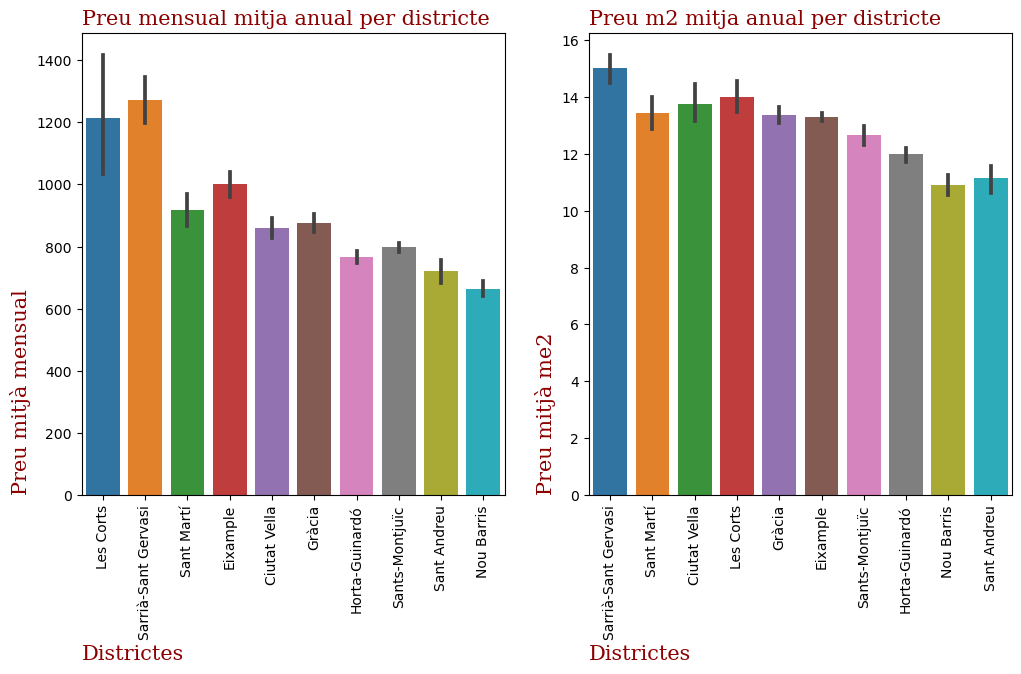

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear los dos gráficos de barras
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

sns.barplot(x='nom_districte', y='preu_lloguer_mitja_mes', data=cadastre_lloguer.sort_values('preu_lloguer_mitja_mes', ascending=False), ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Preu mensual mitja anual per districte', fontdict = font2, loc = 'left')
ax1.set_xlabel('Districtes', fontdict = font2, loc = 'left')
ax1.set_ylabel('Preu mitjà mensual', fontdict = font2, loc = 'bottom')

sns.barplot(x='nom_districte', y='preu_lloguer_mitja_m2', data=cadastre_lloguer.sort_values('preu_lloguer_mitja_m2', ascending=False), ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Preu m2 mitja anual per districte', fontdict = font2, loc = 'left')
ax2.set_xlabel('Districtes', fontdict = font2, loc = 'left')
ax2.set_ylabel('Preu mitjà me2', fontdict = font2, loc = 'bottom')

plt.show()

##### Comentaris de la visualització

Em semblava comprovar si la distibució dels districtes del cost mensual del lloguer tenia el mateix en ordre tant en el preu mensual com en el preu per m2. Podem observar que no és cumpleix aquesta premisa que a priori podria semblar lògica. 

També te el seu què la comparació perquè ens pot influir a la decisió si preferim un tipus de barri o mirar si ens interessa més el m2 o el preu global. A la hora de que ens diguin un preu per un pis com més informació que ens pugui beneficiar millor, tant si som agència com si som clients. 

Ens permetrà valorar si ens surt a compte més m2 o millor barri. A més informació millor podem valorar. 

C:\Users\bgarm\AppData\Local\Temp\ipykernel_24648\726368757.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = cadastre_lloguer.groupby('nom_districte')['nom_barri', 'preu_lloguer_mitja_mes'].agg(['min', 'max'])


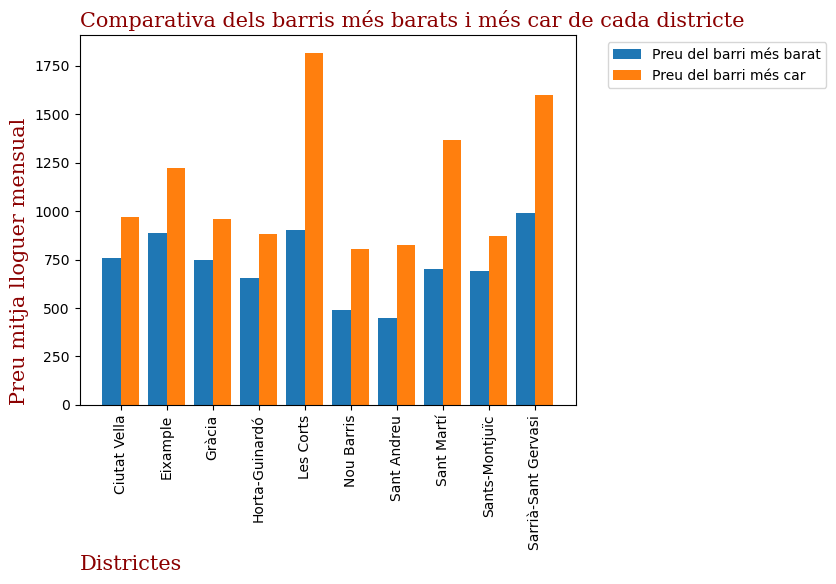

In [25]:
#Comparativa de preus dels barris de cada districtes més cars i més baixos
# Obtenir les dades
data = cadastre_lloguer.groupby('nom_districte')['nom_barri', 'preu_lloguer_mitja_mes'].agg(['min', 'max'])

# Crear la columna del barri més barat
preu_barri_min = data['preu_lloguer_mitja_mes']['min']
x_pos = list(range(len(preu_barri_min)))
plt.bar(x_pos, preu_barri_min, width=0.4, label='Preu del barri més barat')

# Crear la columna del barri més car
preu_barri_max = data['preu_lloguer_mitja_mes']['max']
x_pos = [x + 0.4 for x in x_pos]
plt.bar(x_pos, preu_barri_max, width=0.4, label='Preu del barri més car')

# Configurar el gráfico
plt.title('Comparativa dels barris més barats i més car de cada districte', fontdict = font2, loc = 'left')
plt.xticks([i + 0.2 for i in range(len(preu_barri_min))], data.index, rotation=90)
plt.ylabel('Preu mitja lloguer mensual', fontdict = font2, loc = 'bottom')
plt.xlabel('Districtes', fontdict = font2, loc = 'left')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


##### Comentaris de la visualització

Aquest gràfic em sembla interessant per veure la comparació entre si val més la pena els pisos en els pitjors (més barats) o millors (més cars) barris de cada districte.

Per exemple ens pot obrir el debat de si preferim viure en el pitjor barri de l'Eixample o el millor de Ciutat Vella. 
Podem veure que per exemple el millor barri de Sant Martí te un cost mensual bastant elevat o que el barri de Les corts és molt més car que el de Sarrià-Sant Gervasi.

Son algunes observacions que d'entrada no hauries dit mai amb la informació sense les dades.
